In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.io.sql as pd_sql
import sqlite3 as sql

%matplotlib inline

In [24]:
con = sql.connect("mooc.db") 

In [25]:
FEATURES = [
    'studentid',
    'clicks',
    'plays',
    'pauses',
    'seeks',
    'loads',
    'transcript',
    'max video',
    'module',
    'videos_clicked',
    'percent_clicked',
    'seeks_neutral',
    'seeks_fastforward',
    'seeks_rewind',
    'speed_changes',
    'len_vid_sum',
    'seek_ff_rate',
    'seek_rw_rate',
    'spd_ch_rate',
    'pause_rate',
    'click_rate',
    'is_complete',
]

In [26]:
df = pd.read_csv("ml3.csv", sep=',')

In [27]:
LABEL_MAP = {
    0: 'NotComplete',
    1: 'Completed',
}   

In [28]:
for k,v in LABEL_MAP.items():
    df.ix[df.is_complete == k, 'is_complete'] = v

In [29]:
df.head()

,studentid,clicks,plays,pauses,seeks,loads,transcript,max_video,module,videos_clicked,percent_clicked,seeks_neutral,seeks_fastforward,seeks_rewind,speed_changes,len_vid_sum,seek_ff_rate,seek_rw_rate,spd_ch_rate,pause_rate,
0,126,37,5,NaN,5,11,11,33,4,9,10.112360,NaN,NaN,5,4,5880,NaN,0.000850,0.000680,NaN,...
1,644,599,155,103,26,137,93,88,8,79,88.764045,NaN,15,11,3,27640,0.000543,0.000398,0.000109,0.003726,...
2,651,294,69,23,27,83,86,80,8,49,55.056180,NaN,NaN,27,2,26402,NaN,0.001023,0.000076,0.000871,...
3,884,80,3,2,NaN,36,37,14,2,14,15.730337,NaN,NaN,NaN,2,7352,NaN,NaN,0.000272,0.000272,...
4,406,40,6,5,NaN,9,15,7,1,7,7.865169,NaN,NaN,NaN,3,2116,NaN,NaN,0.001418,0.002363,...


In [30]:
df.describe()

,studentid,clicks,plays,pauses,seeks,loads,transcript,max_video,module,videos_clicked,percent_clicked,seeks_neutral,seeks_fastforward,seeks_rewind,speed_changes,len_vid_sum,seek_ff_rate,seek_rw_rate,spd_ch_rate,pause_rate,
count,7241.000000,7241.000000,5496.000000,5182.000000,3533.000000,7153.000000,6579.000000,7241.000000,7241.000000,7241.000000,7241.000000,2054.000000,2674.000000,2517.000000,1405.000000,7241.000000,2674.000000,2517.000000,1405.000000,5182.000000,...
mean,3823.911614,216.028173,73.735808,55.423003,29.844325,48.633301,46.146375,32.718409,3.628919,21.766193,24.456396,7.537001,16.321990,18.400477,8.444128,10228.345947,0.001033,0.001302,0.000890,0.004153,...
std,2216.635832,428.697923,173.554488,119.017611,116.814556,85.033568,83.488052,33.454869,2.894172,28.986440,32.569034,26.625368,36.822888,103.019926,15.317273,13329.233300,0.002214,0.004450,0.001951,0.007186,...
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,62.000000,0.000025,0.000025,0.000025,0.000025,...
25%,1898.000000,10.000000,4.000000,3.000000,3.000000,3.000000,3.000000,6.000000,1.000000,2.000000,2.247191,1.000000,2.000000,2.000000,2.000000,593.000000,0.000193,0.000151,0.000154,0.001457,...
50%,3824.000000,41.000000,16.000000,12.000000,8.000000,11.000000,10.000000,14.000000,2.000000,7.000000,7.865169,3.000000,5.000000,4.000000,3.000000,4500.000000,0.000474,0.000355,0.000373,0.002711,...
75%,5741.000000,219.000000,79.000000,61.750000,25.000000,54.000000,47.000000,68.000000,7.000000,29.000000,32.584270,6.000000,16.000000,12.000000,8.000000,12048.000000,0.001100,0.000958,0.000922,0.004695,...
max,7674.000000,9144.000000,4164.000000,2279.000000,4017.000000,877.000000,902.000000,88.000000,8.000000,88.000000,98.876404,698.000000,879.000000,3075.000000,205.000000,40001.000000,0.055556,0.088889,0.042254,0.274468,...


In [31]:
print "{} instances with {} features\n".format(*df.shape)

print df.groupby('module')['module'].count()

7241 instances with 22 features

module
0          377
1         2402
2          903
3          449
4          551
5          356
6          264
7          358
8         1581
dtype: int64


In [32]:
df = df.drop(['studentid'], axis=1)
df = df.drop(['plays'], axis=1)
df = df.drop(['pauses'], axis=1)
df = df.drop(['seeks'], axis=1)
df = df.drop(['loads'], axis=1)
df = df.drop(['transcript'], axis=1)
df = df.drop(['seeks_neutral'], axis=1)
df = df.drop(['seeks_fastforward'], axis=1)
df = df.drop(['seeks_rewind'], axis=1)
df = df.drop(['speed_changes'], axis=1)

In [33]:
df['max_module_genomics'] = 8

#df['clicks_per_module'] = df['clicks']/df['videos_clicked']
## doesn't work b/c some students only got to module 0

In [34]:
df.head()

,clicks,max_video,module,videos_clicked,percent_clicked,len_vid_sum,seek_ff_rate,seek_rw_rate,spd_ch_rate,pause_rate,click_rate,is_complete,max_module_genomics
0,37,33,4,9,10.112360,5880,NaN,0.000850,0.000680,NaN,0.006293,NotComplete,8
1,599,88,8,79,88.764045,27640,0.000543,0.000398,0.000109,0.003726,0.021671,Completed,8
2,294,80,8,49,55.056180,26402,NaN,0.001023,0.000076,0.000871,0.011136,NotComplete,8
3,80,14,2,14,15.730337,7352,NaN,NaN,0.000272,0.000272,0.010881,NotComplete,8
4,40,7,1,7,7.865169,2116,NaN,NaN,0.001418,0.002363,0.018904,NotComplete,8


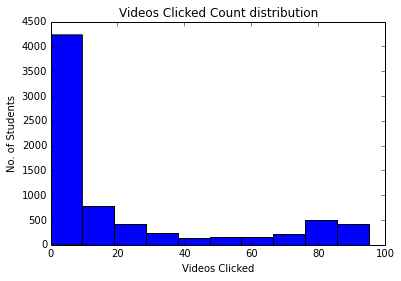

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['videos_clicked'], bins = 10, range = (0,95))
plt.title('Videos Clicked Count distribution')
plt.xlabel('Videos Clicked')
plt.ylabel('No. of Students')
plt.show()

In [36]:
a = df['seek_ff_rate'].isnull()
a.sum(axis=True)

4567

In [37]:
#df['seek_ff_rate'].fillna(value=0)
df = df.fillna(0)

In [38]:
df['seek_ff_rate'] = df['seek_ff_rate'].multiply(3600)
df['seek_rw_rate'] = df['seek_rw_rate'].multiply(3600)
df['spd_ch_rate'] = df['spd_ch_rate'].multiply(3600)
df['pause_rate'] = df['pause_rate'].multiply(3600)
df['click_rate'] = df['click_rate'].multiply(3600)


In [39]:
df.head()

,clicks,max_video,module,videos_clicked,percent_clicked,len_vid_sum,seek_ff_rate,seek_rw_rate,spd_ch_rate,pause_rate,click_rate,is_complete,max_module_genomics
0,37,33,4,9,10.112360,5880,0.00000,3.061224,2.448980,0.000000,22.653061,NotComplete,8
1,599,88,8,79,88.764045,27640,1.95369,1.432706,0.390738,13.415340,78.017366,Completed,8
2,294,80,8,49,55.056180,26402,0.00000,3.681539,0.272707,3.136126,40.087872,NotComplete,8
3,80,14,2,14,15.730337,7352,0.00000,0.000000,0.979325,0.979325,39.173014,NotComplete,8
4,40,7,1,7,7.865169,2116,0.00000,0.000000,5.103970,8.506616,68.052930,NotComplete,8


In [40]:
df[df.is_complete == "Completed"].head()


,clicks,max_video,module,videos_clicked,percent_clicked,len_vid_sum,seek_ff_rate,seek_rw_rate,spd_ch_rate,pause_rate,click_rate,is_complete,max_module_genomics
1,599,88,8,79,88.764045,27640,1.953690,1.432706,0.390738,13.415340,78.017366,Completed,8
22,1053,88,8,86,96.629213,39803,3.165591,14.923498,0.271336,18.360425,95.239052,Completed,8
26,446,88,8,72,80.898876,33996,0.529474,0.847158,0.105895,6.777268,47.229086,Completed,8
27,1666,88,8,88,98.876404,40001,7.829804,5.849854,3.869903,26.639334,149.936252,Completed,8
28,1102,88,8,84,94.382022,38817,5.842801,1.947600,4.637144,17.157431,102.202643,Completed,8


In [41]:
df[df.is_complete == "NotComplete"].head()

,clicks,max_video,module,videos_clicked,percent_clicked,len_vid_sum,seek_ff_rate,seek_rw_rate,spd_ch_rate,pause_rate,click_rate,is_complete,max_module_genomics
0,37,33,4,9,10.112360,5880,0,3.061224,2.448980,0.000000,22.653061,NotComplete,8
2,294,80,8,49,55.056180,26402,0,3.681539,0.272707,3.136126,40.087872,NotComplete,8
3,80,14,2,14,15.730337,7352,0,0.000000,0.979325,0.979325,39.173014,NotComplete,8
4,40,7,1,7,7.865169,2116,0,0.000000,5.103970,8.506616,68.052930,NotComplete,8
5,179,85,8,39,43.820225,12534,0,0.861656,0.287219,10.339876,51.412159,NotComplete,8


In [42]:
len(df[df.is_complete == "Completed"])

1121

In [43]:
len(df[df.is_complete == "NotComplete"])

6120

In [44]:
df = df.drop(['len_vid_sum'], axis=1)

In [45]:
df = df.drop(['videos_clicked'], axis=1)

In [46]:
df = df.drop(['max_video'], axis=1)

In [47]:
df = df.drop(['max_module_genomics'], axis=1)

In [48]:
df = df.drop(['clicks'], axis=1)

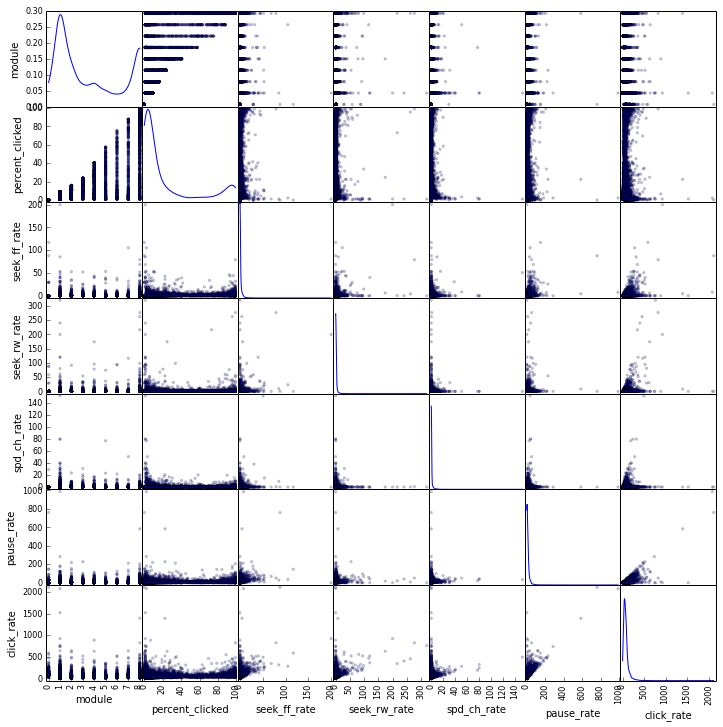

In [61]:
# Create a scatter matrix of the dataframe features
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

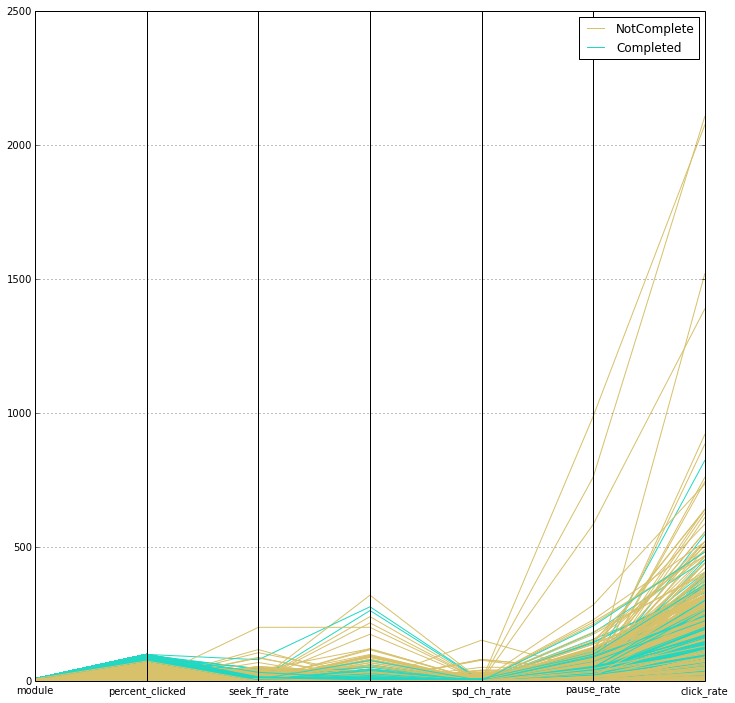

In [62]:
from pandas.tools.plotting import parallel_coordinates
plt.figure(figsize=(12,12))
parallel_coordinates(df, 'is_complete')
plt.show()

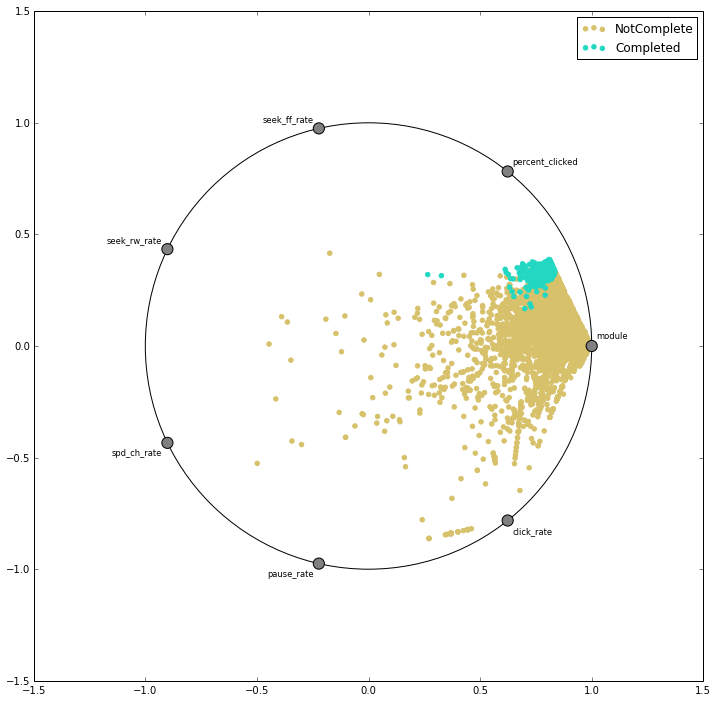

In [63]:
from pandas.tools.plotting import radviz
plt.figure(figsize=(12,12))
radviz(df, 'is_complete')
plt.show()

In [49]:
# These features are skewing the ML estimator results.  F1 scores of .985 and 1.0 are 
#   not realistic.  Given how the data is laid out, these features need to be dropped.  
#   If the data was organized differently, as in, percent_completed up to this specific
#   point in time, then that would be a very helpful feature.  But percent_complete of 
#   the entire course, run at the end of the course, skews the data towards those who
#   completed the course.  It does not help when we are half-way through the course and
#   we want to predict drop-outs and completers.  A good next step would be to calculate
#   the percent_complete based the specific point in time the estimator is run.  And then,
#   I would assume, this information would be applicable and would not skew the results.

df = df.drop(['module'], axis=1)
df = df.drop(['percent_clicked'], axis=1)

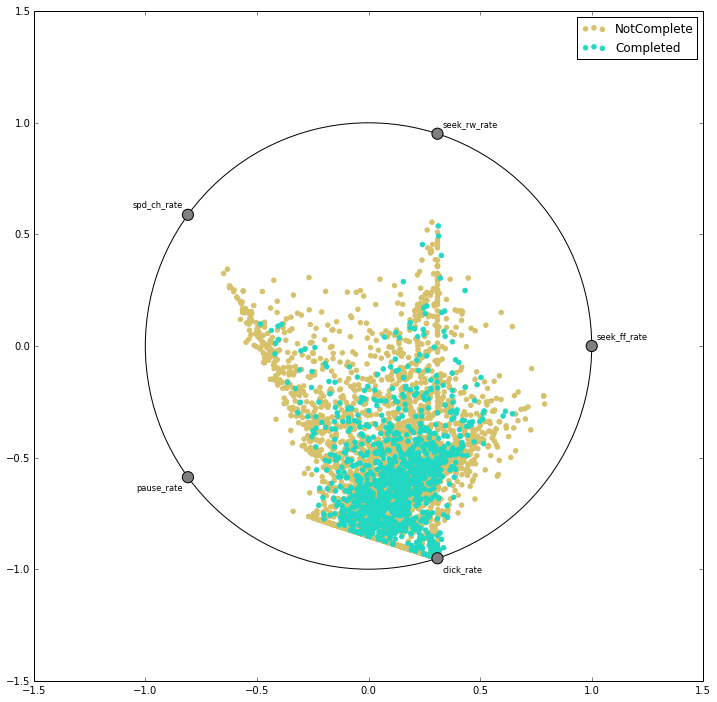

In [50]:
from pandas.tools.plotting import radviz
plt.figure(figsize=(12,12))
radviz(df, 'is_complete')
plt.show()


In [66]:
#df = df.drop(['click_rate'], axis=1)

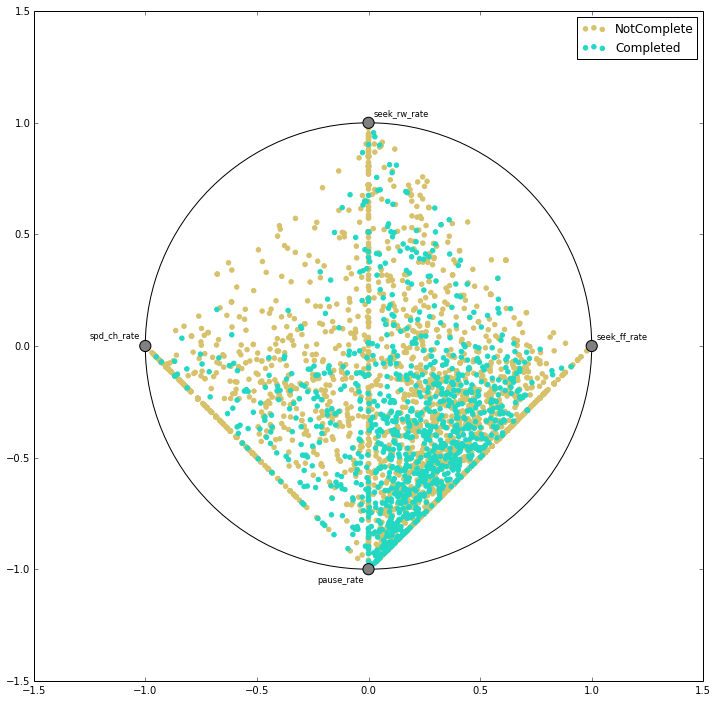

In [67]:
"""
from pandas.tools.plotting import radviz
plt.figure(figsize=(12,12))
radviz(df, 'is_complete')
plt.show()
"""

In [51]:
df.loc[df.is_complete == "NotComplete", 'is_complete'] = 0
df.loc[df.is_complete == "Completed", 'is_complete'] = 1

In [52]:
df.head()

,seek_ff_rate,seek_rw_rate,spd_ch_rate,pause_rate,click_rate,is_complete
0,0.00000,3.061224,2.448980,0.000000,22.653061,0
1,1.95369,1.432706,0.390738,13.415340,78.017366,1
2,0.00000,3.681539,0.272707,3.136126,40.087872,0
3,0.00000,0.000000,0.979325,0.979325,39.173014,0
4,0.00000,0.000000,5.103970,8.506616,68.052930,0


In [53]:
df.to_csv('capstone_ml/mooc_dataset.csv', sep=' ')

In [2]:
import os
import json
import time
import pickle


In [4]:
from sklearn.datasets.base import Bunch

DATA_DIR = os.path.abspath(os.path.join(".", "..", "capstone_ml"))

# Show the contents of the data directory
for name in os.listdir(DATA_DIR):
    if name.startswith("."): continue
    print "- {}".format(name)


- mooc-random-forest-classifier.pickle
- meta.json
- mooc_dataset.txt~
- meta.json~
- mooc-knn-classifier.pickle
- mooc_dataset.csv
- ml3.csv
- mooc_dataset.csv~
- README.md
- mooc2_capstone.ipynb
- postgres.py
- mooc-svm-classifier.pickle


In [7]:
def load_data(root=DATA_DIR):
    # Construct the `Bunch` for the mooc dataset
    filenames     = {
        'meta': os.path.join(root, 'meta.json'),
        'rdme': os.path.join(root, 'README.md'),
        'data': os.path.join(root, 'mooc_dataset.csv'),
    }

    # Load the meta data from the meta json
    with open(filenames['meta'], 'r') as f:
        meta = json.load(f)
        target_names  = meta['target_names']
        feature_names = meta['feature_names']

    # Load the description from the README. 
    with open(filenames['rdme'], 'r') as f:
        DESCR = f.read()

    # Load the dataset from the text file.
    dataset = np.loadtxt(filenames['data'])

    # Extract the target from the data
    data   = dataset[:, 1:-1]  #colon means all the rows; 0:-1 means rows from first to second to last
    target = dataset[:, -1]    #take last column for all the rows

    # Create the bunch object
    return Bunch(
        data=data,
        target=target,
        filenames=filenames,
        target_names=target_names,
        feature_names=feature_names,
        DESCR=DESCR
    )

# Save the dataset as a variable we can use.
dataset = load_data()

print dataset.data.shape
print dataset.target.shape

(7241, 5)
(7241,)


In [52]:
from sklearn import metrics
from sklearn import cross_validation
from sklearn.cross_validation import KFold

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

In [12]:
def fit_and_evaluate(dataset, model, label, **kwargs):
    """
    Because of the Scikit-Learn API, we can create a function to
    do all of the fit and evaluate work on our behalf!
    """
    start  = time.time() # Start the clock! 
    scores = {'precision':[], 'recall':[], 'accuracy':[], 'f1':[]}
    
    for train, test in KFold(dataset.data.shape[0], n_folds=12, shuffle=True):
        X_train, X_test = dataset.data[train], dataset.data[test]
        y_train, y_test = dataset.target[train], dataset.target[test]
        
        estimator = model(**kwargs)
        estimator.fit(X_train, y_train)
        
        expected  = y_test
        predicted = estimator.predict(X_test)
        
        # Append our scores to the tracker
        scores['precision'].append(metrics.precision_score(expected, predicted, average='binary'))
        scores['recall'].append(metrics.recall_score(expected, predicted, average='binary'))
        scores['accuracy'].append(metrics.accuracy_score(expected, predicted))
        scores['f1'].append(metrics.f1_score(expected, predicted, average='binary'))

    # Report
    print "Build and Validation of {} took {:0.3f} seconds".format(label, time.time()-start)
    print "Validation scores are as follows:\n"
    print pd.DataFrame(scores).mean()
    
    # Write official estimator to disk
    estimator = model(**kwargs)
    estimator.fit(dataset.data, dataset.target)
    
    outpath = label.lower().replace(" ", "-") + ".pickle"
    with open(outpath, 'w') as f:
        pickle.dump(estimator, f)

    print "\nFitted model written to:\n{}".format(os.path.abspath(outpath))

In [61]:
# Perform SVC Classification
fit_and_evaluate(dataset, SVC, "MOOC SVM Classifier")

Build and Validation of MOOC SVM Classifier took 44.649 seconds
Validation scores are as follows:

accuracy     0.839805
f1           0.090153
precision    0.379591
recall       0.051426
dtype: float64

Fitted model written to:
/home/liljfrk3/Desktop/Python/edx-insights/mooc-svm-classifier.pickle


In [45]:
# Perform kNN Classification
fit_and_evaluate(dataset, KNeighborsClassifier, "MOOC kNN Classifier", n_neighbors=3)

Build and Validation of MOOC kNN Classifier took 0.318 seconds
Validation scores are as follows:

accuracy     0.812460
f1           0.304932
precision    0.357549
recall       0.269098
dtype: float64

Fitted model written to:
/home/liljfrk3/Desktop/Python/edx-insights/capstone_ml/mooc-knn-classifier.pickle


In [55]:
# Perform Random Forest Classification
fit_and_evaluate(dataset, RandomForestClassifier, "MOOC Random Forest Classifier")

Build and Validation of MOOC Random Forest Classifier took 1.790 seconds
Validation scores are as follows:

accuracy     0.879708
f1           0.558248
precision    0.647145
recall       0.495473
dtype: float64

Fitted model written to:
/home/liljfrk3/Desktop/Python/edx-insights/capstone_ml/mooc-random-forest-classifier.pickle


In [61]:
# Perform Decision Tree Classifier
fit_and_evaluate(dataset, DecisionTreeClassifier, "MOOC Decision Tree Classifier")

Build and Validation of MOOC Decision Tree Classifier took 0.554 seconds
Validation scores are as follows:

accuracy     0.864525
f1           0.558030
precision    0.561890
recall       0.556953
dtype: float64

Fitted model written to:
/home/liljfrk3/Desktop/Python/edx-insights/capstone_ml/mooc-decision-tree-classifier.pickle


In [62]:
# Perform Decision Tree Regressor
fit_and_evaluate(dataset, DecisionTreeRegressor, "MOOC Decision Tree Regressor")

Build and Validation of MOOC Decision Tree Regressor took 0.476 seconds
Validation scores are as follows:

accuracy     0.857889
f1           0.545271
precision    0.541599
recall       0.553453
dtype: float64

Fitted model written to:
/home/liljfrk3/Desktop/Python/edx-insights/capstone_ml/mooc-decision-tree-regressor.pickle


In [59]:
# Perform Gaussian Naive Bayes
fit_and_evaluate(dataset, GaussianNB, "MOOC Gaussian Naive Bayes")

Build and Validation of MOOC Gaussian Naive Bayes took 0.183 seconds
Validation scores are as follows:

accuracy     0.838971
f1           0.048020
precision    0.261156
recall       0.026682
dtype: float64

Fitted model written to:
/home/liljfrk3/Desktop/Python/edx-insights/capstone_ml/mooc-gaussian-naive-bayes.pickle


In [63]:
# Perform AdaBoost Classifier
fit_and_evaluate(dataset, AdaBoostClassifier, "MOOC AdaBoost Classifier")

Build and Validation of MOOC AdaBoost Classifier took 5.718 seconds
Validation scores are as follows:

accuracy     0.874050
f1           0.486864
precision    0.658405
recall       0.388496
dtype: float64

Fitted model written to:
/home/liljfrk3/Desktop/Python/edx-insights/capstone_ml/mooc-adaboost-classifier.pickle


In [46]:
# Perform SGD Classifier
fit_and_evaluate(dataset, SGDClassifier, "MOOC SGD Classifier")

Build and Validation of MOOC SGD Classifier took 0.124 seconds
Validation scores are as follows:

accuracy     0.828192
f1           0.059208
precision    0.085229
recall       0.063860
dtype: float64

Fitted model written to:
/home/liljfrk3/Desktop/Python/edx-insights/capstone_ml/mooc-sgd-classifier.pickle
